<a href="https://colab.research.google.com/github/SriRamK345/NLP_dataset/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## https://www.javatpoint.com/long-short-term-memory-rnn-in-tensorflow

In [ ]:
## https://colah.github.io/posts/2015-08-Understanding-LSTMs/

In [ ]:
## https://github.com/b-knight/Recurrent-Neural-Networks-and-Long-Short-Term-Memory-Models

**Types of Recurrent Neural Networks (RNNs)**

RNNs are a powerful class of neural networks designed to process sequential data. Different types of RNNs have been developed to address specific challenges and improve performance. Here are some common types:

1. **Simple RNNs:**
   - The most basic form of RNN.
   - Can suffer from the vanishing gradient problem, making it difficult to learn long-term dependencies.

2. **Long Short-Term Memory (LSTM) Networks:**
   - Introduced to address the vanishing gradient problem.
   - Use gates (input, forget, and output) to control the flow of information, allowing them to learn long-term dependencies more effectively.

3. **Gated Recurrent Units (GRUs):**
   - Similar to LSTMs but have a simpler structure, reducing computational overhead.
   - Also designed to address the vanishing gradient problem.

4. **Bidirectional RNNs:**
   - Process input sequences in both directions, allowing the network to capture dependencies from both the past and future.
   - Useful for tasks like sentiment analysis and machine translation.

5. **Deep RNNs:**
   - Stack multiple RNN layers to create deeper networks, which can capture more complex patterns in the data.

6. **Attention Mechanisms:**
   - Incorporate attention mechanisms to focus on specific parts of the input sequence, improving performance on tasks like machine translation and text summarization.

**Choosing the Right RNN Type:**

The choice of RNN type depends on the specific task and the nature of the sequential data. For example:

* **Simple RNNs** may be sufficient for short sequences or tasks that don't require capturing long-term dependencies.
* **LSTMs** or **GRUs** are often preferred for tasks involving long sequences or complex patterns.
* **Bidirectional RNNs** are useful when the context from both the past and future is important.

By understanding the different types of RNNs and their characteristics, you can choose the most appropriate one for your specific application.


## Recurrent Neural Networks

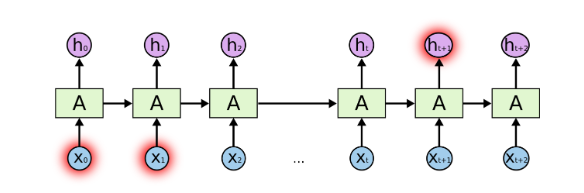

## LSTM Networks

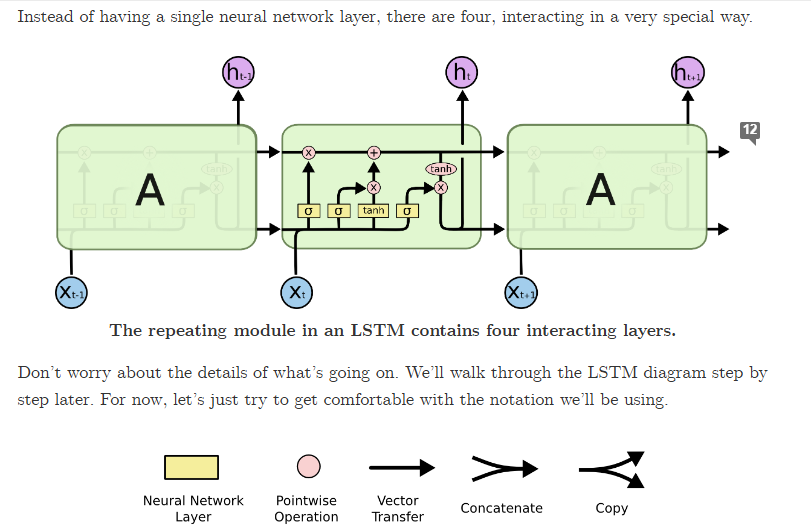


## https://dwbi1.wordpress.com/2021/08/07/recurrent-neural-network-rnn-and-lstm/

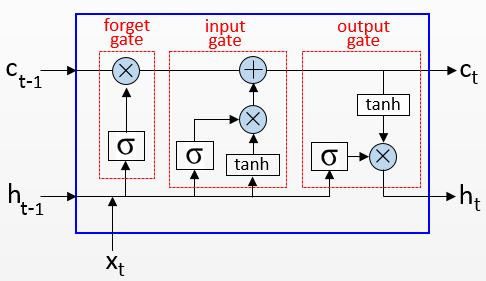

## Word Embedding Techniques using Embedding Layer in Keras

In [ ]:
### Libraries USed Tensorflow> 2.0  and keras

In [6]:
# ! pip install tensorflow

In [5]:
import tensorflow as tf

In [7]:
from tensorflow.keras.preprocessing.text import one_hot

### sentences

In [9]:
sent=[  'the glass of milk',
     'the glass of juice',
     'the cup of tea',
    'I am a good boy',
     'I am a good developer',
     'understand the meaning of words',
     'your videos are good']

In [10]:
sent

['the glass of milk',
 'the glass of juice',
 'the cup of tea',
 'I am a good boy',
 'I am a good developer',
 'understand the meaning of words',
 'your videos are good']

In [11]:
voc_size =10000

## One hot Representaion

In [13]:
onehot_repr=[one_hot(words,voc_size) for words in sent]
print(onehot_repr) # sentences index number

[[8817, 4128, 7111, 8220], [8817, 4128, 7111, 2032], [8817, 8730, 7111, 4972], [4836, 3582, 13, 7050, 8702], [4836, 3582, 13, 7050, 4604], [81, 8817, 1658, 7111, 888], [4384, 9199, 8017, 7050]]


## Word Embedding Represntation

In [14]:
from tensorflow.keras.layers import Embedding #
from tensorflow.keras.preprocessing.sequence import pad_sequences # prepadding and postpadding
from tensorflow.keras.models import Sequential # model

In [15]:
import numpy as np

## pre padding

In [16]:
sent_length=8
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length) # if padding='post' Zero will add in last
print(embedded_docs)

[[   0    0    0    0 8817 4128 7111 8220]
 [   0    0    0    0 8817 4128 7111 2032]
 [   0    0    0    0 8817 8730 7111 4972]
 [   0    0    0 4836 3582   13 7050 8702]
 [   0    0    0 4836 3582   13 7050 4604]
 [   0    0    0   81 8817 1658 7111  888]
 [   0    0    0    0 4384 9199 8017 7050]]


Values to vectors

In [ ]:
## 10 feature dimesnions
dim_size=10

In [17]:
model=Sequential()
model.add(Embedding(voc_size,10,input_length=sent_length))
model.compile('adam','mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
(embedded_docs)[0] # 1st Sentences

array([   0,    0,    0,    0, 8817, 4128, 7111, 8220], dtype=int32)

In [19]:
model.predict(embedded_docs)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


array([[ 0.00706663, -0.00290972,  0.01170148, -0.01463647,  0.01800345,
         0.02702573, -0.01221024, -0.01372936, -0.02708617,  0.02243383],
       [ 0.00706663, -0.00290972,  0.01170148, -0.01463647,  0.01800345,
         0.02702573, -0.01221024, -0.01372936, -0.02708617,  0.02243383],
       [ 0.00706663, -0.00290972,  0.01170148, -0.01463647,  0.01800345,
         0.02702573, -0.01221024, -0.01372936, -0.02708617,  0.02243383],
       [ 0.00706663, -0.00290972,  0.01170148, -0.01463647,  0.01800345,
         0.02702573, -0.01221024, -0.01372936, -0.02708617,  0.02243383],
       [-0.01361392, -0.00464807, -0.01495466, -0.03066293, -0.04958458,
         0.03403738,  0.01817929,  0.00875791,  0.02736035, -0.00659094],
       [ 0.00727451,  0.02046314, -0.00810646,  0.03983534, -0.01631064,
        -0.01102812, -0.03245088,  0.01469405,  0.04004338,  0.00438388],
       [ 0.01705888,  0.00248148, -0.00710278,  0.03628996, -0.01068645,
        -0.01036761,  0.00978021, -0.02466238

In [22]:
print(model.predict(embedded_docs))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[[ 0.00706663 -0.00290972  0.01170148 -0.01463647  0.01800345
    0.02702573 -0.01221024 -0.01372936 -0.02708617  0.02243383]
  [ 0.00706663 -0.00290972  0.01170148 -0.01463647  0.01800345
    0.02702573 -0.01221024 -0.01372936 -0.02708617  0.02243383]
  [ 0.00706663 -0.00290972  0.01170148 -0.01463647  0.01800345
    0.02702573 -0.01221024 -0.01372936 -0.02708617  0.02243383]
  [ 0.00706663 -0.00290972  0.01170148 -0.01463647  0.01800345
    0.02702573 -0.01221024 -0.01372936 -0.02708617  0.02243383]
  [-0.01361392 -0.00464807 -0.01495466 -0.03066293 -0.04958458
    0.03403738  0.01817929  0.00875791  0.02736035 -0.00659094]
  [ 0.00727451  0.02046314 -0.00810646  0.03983534 -0.01631064
   -0.01102812 -0.03245088  0.01469405  0.04004338  0.00438388]
  [ 0.01705888  0.00248148 -0.00710278  0.03628996 -0.01068645
   -0.01036761  0.00978021 -0.02466238 -0.02880791 -0.02586515]
  [-0.00859573 -0.02977367  0.03273943 -0.02870157 -0.02244841
    0.0079